In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline ploting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv("tesla.csv")

In [4]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [21]:
tesla.shape

(2193, 7)

In [22]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [23]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [9]:
# checking null values
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
print("Average Open Share Price", np.median(tesla['Open']))

Average Open Share Price 204.990005


In [12]:
tesla['Open'].value_counts()

Open
28.000000     6
30.000000     6
220.000000    5
28.500000     5
26.900000     4
             ..
148.850006    1
147.619995    1
149.800003    1
152.320007    1
283.510010    1
Name: count, Length: 1931, dtype: int64

In [13]:
tesla['Close'].value_counts()

Close
27.420000     4
31.490000     3
34.400002     3
27.570000     3
219.580002    3
             ..
127.279999    1
126.940002    1
120.500000    1
120.839996    1
275.429993    1
Name: count, Length: 2016, dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# converting date
tesla['Date']=pd.to_datetime(tesla['Date'])

In [8]:
# cheking total number of days and stock
print(f'Datafram contain the stock price between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Datafram contain the stock price between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


# Visulization

<Axes: >

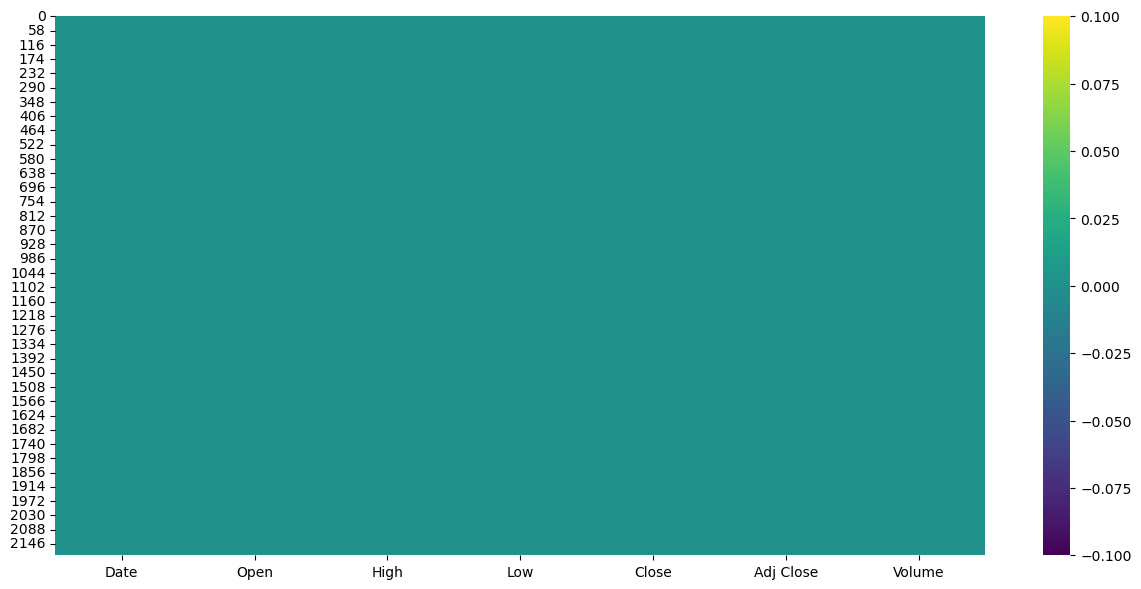

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(tesla.isnull(), cmap='viridis')

<Axes: >

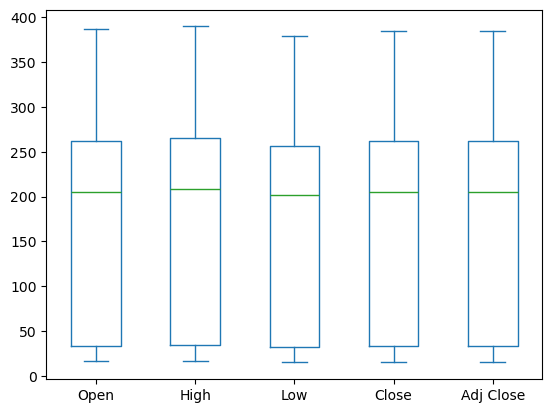

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind="box")

<Axes: >

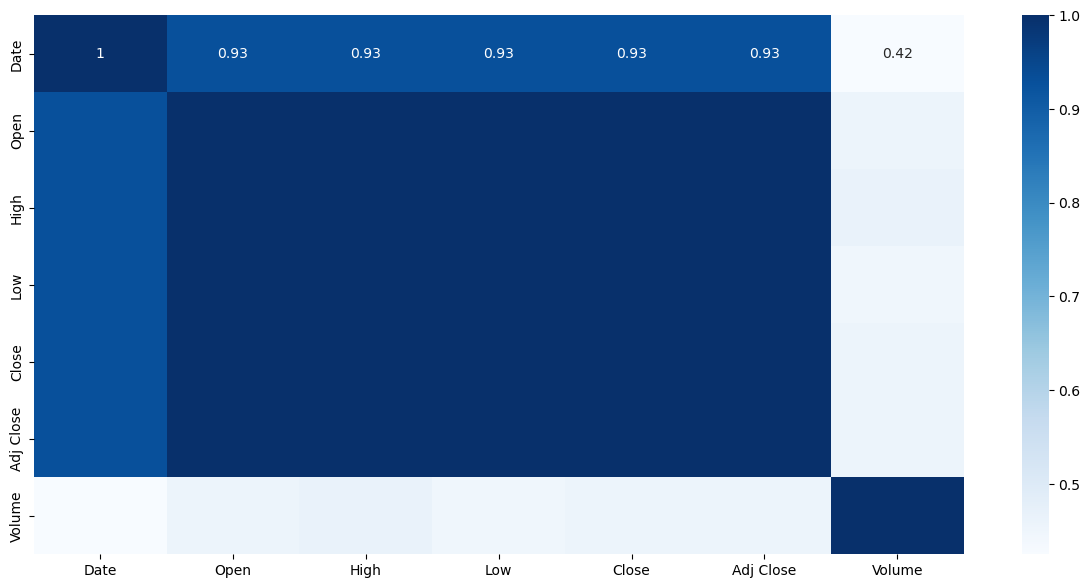

In [19]:
plt.figure(figsize=(15, 7))
sns.heatmap(tesla.corr(),cbar=True,annot=True,cmap='Blues')

<Axes: xlabel='Date', ylabel='High'>

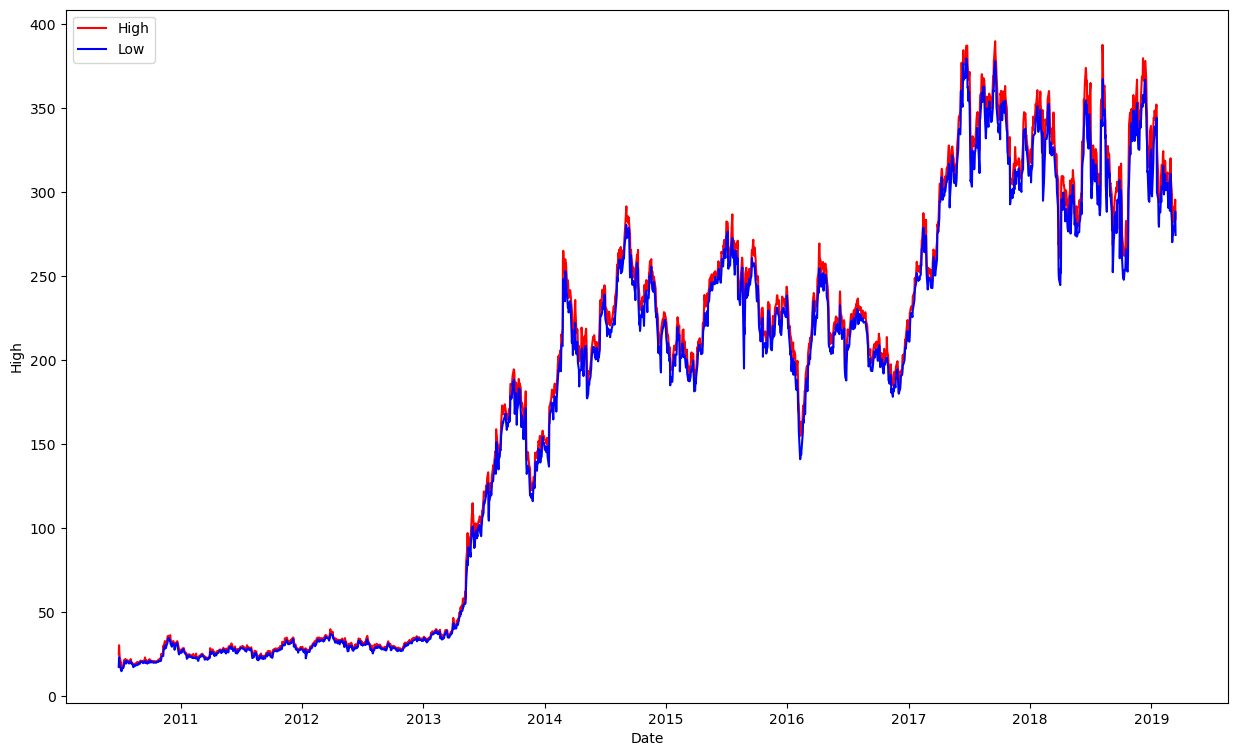

In [38]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=tesla,x="Date",y="High",color="red",label="High")
sns.lineplot(data=tesla,x="Date",y="Low",color="blue",label="Low")

[ 16.139999  16.4       17.389999 ... 381.089996 382.450012 386.690002] This is the Sorted data of Open Share Price


Text(0, 0.5, 'Frequency')

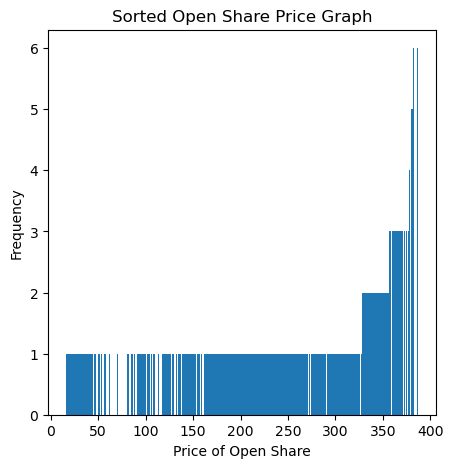

In [39]:
print(np.sort(tesla['Open']), "This is the Sorted data of Open Share Price")
plt.figure(figsize=(5,5))
plt.bar(list(np.sort(tesla['Open'].value_counts().keys())), list(np.sort(tesla['Open'].value_counts())))
plt.title("Sorted Open Share Price Graph")
plt.xlabel("Price of Open Share")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

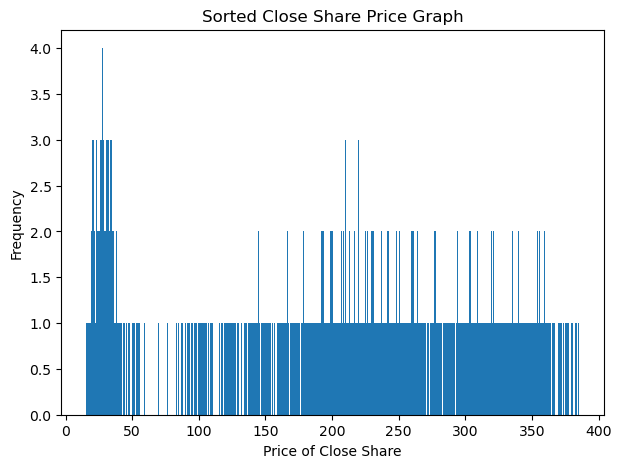

In [41]:
plt.figure(figsize=(7,5))
plt.bar(list(tesla['Close'].value_counts().keys()), list((tesla['Close'].value_counts())))
plt.title("Sorted Close Share Price Graph")
plt.xlabel("Price of Close Share")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

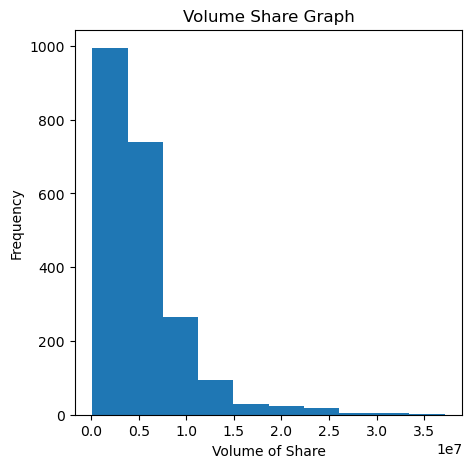

In [42]:
plt.figure(figsize=(5,5))
plt.hist(list(tesla['Volume'].value_counts().keys()))
plt.title("Volume Share Graph")
plt.xlabel("Volume of Share")
plt.ylabel("Frequency")

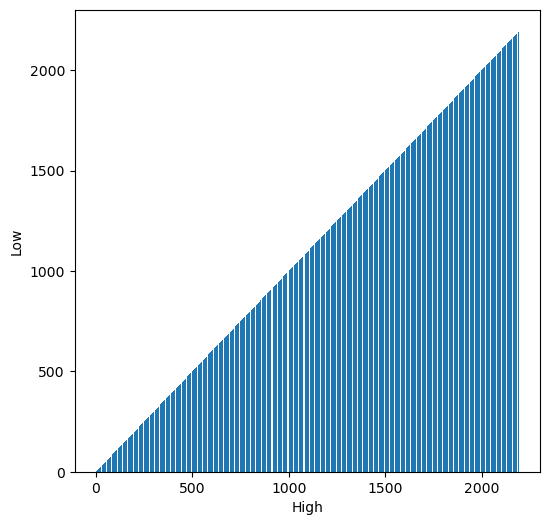

In [36]:
plt.figure(figsize=(6,6))
plt.bar(list(tesla['High'].keys()), list(tesla['Low'].keys()))
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

<BarContainer object of 2016 artists>

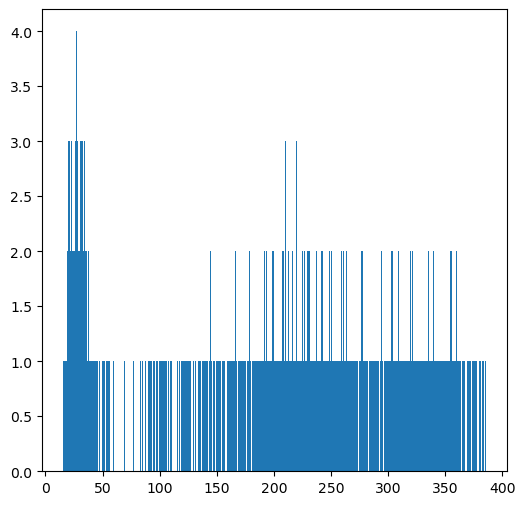

In [37]:
plt.figure(figsize=(6,6))
plt.bar(tesla['Adj Close'].value_counts().keys(), tesla['Adj Close'].value_counts())

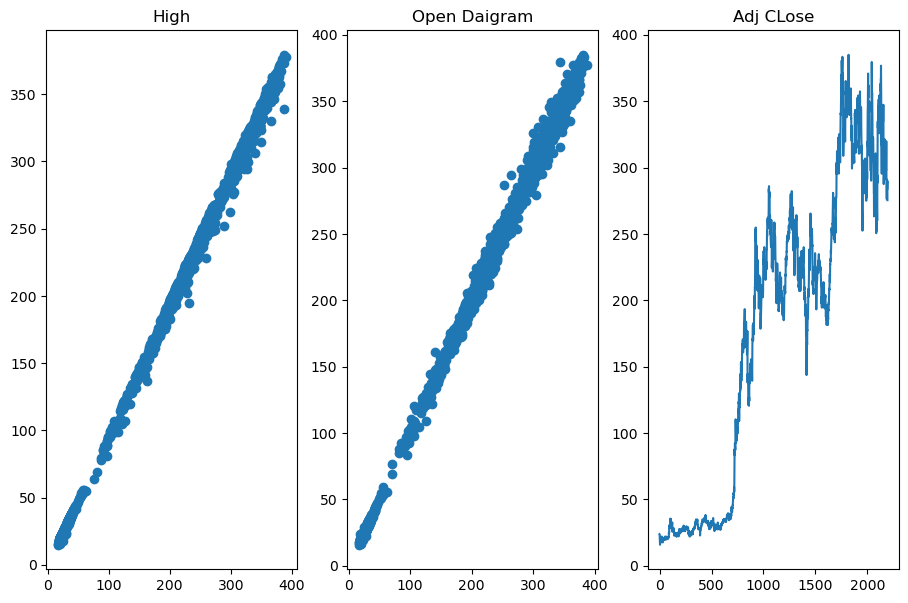

In [45]:
plt.figure(figsize=(11, 7))
plt.subplot(131)
plt.plot(list(tesla['High']), list(tesla['Low']), 'o')
plt.title("High")
plt.subplot(132)
plt.scatter(list(tesla['Open']), list(tesla['Close']))
plt.title("Open Daigram")
plt.subplot(133)
plt.plot(list(tesla['Adj Close']))
plt.title("Adj CLose")
plt.show()

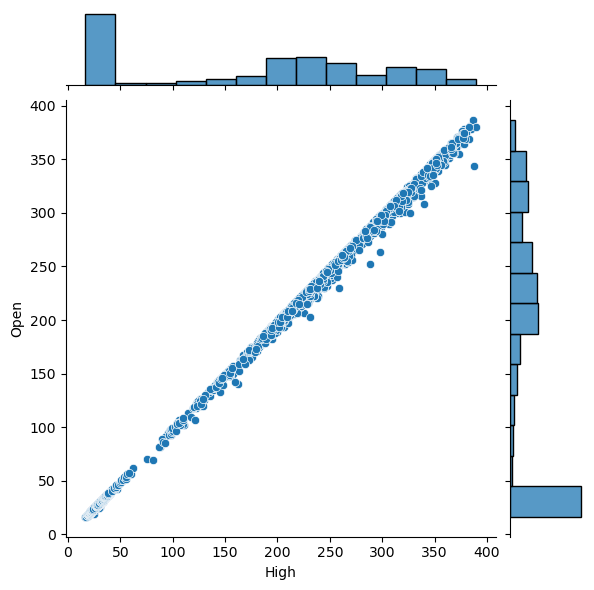

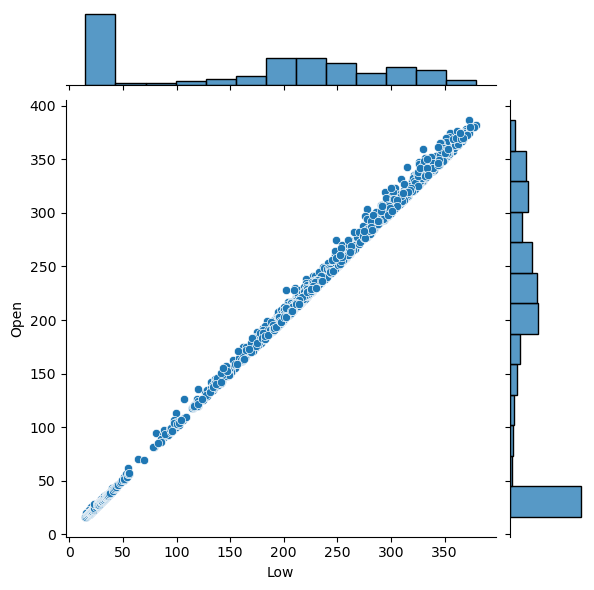

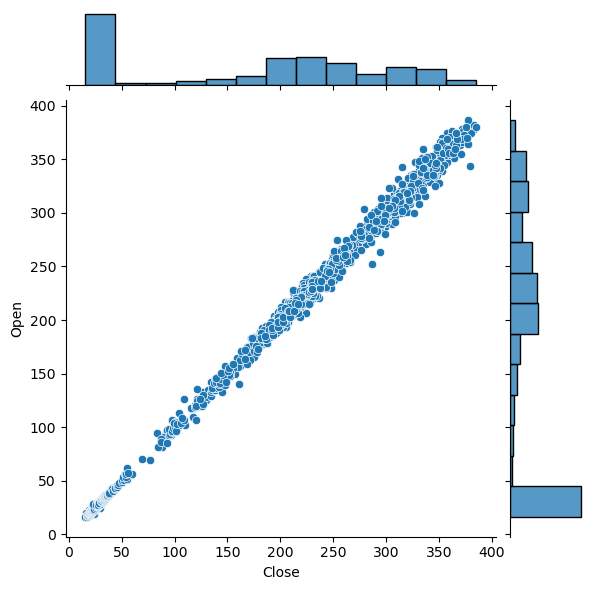

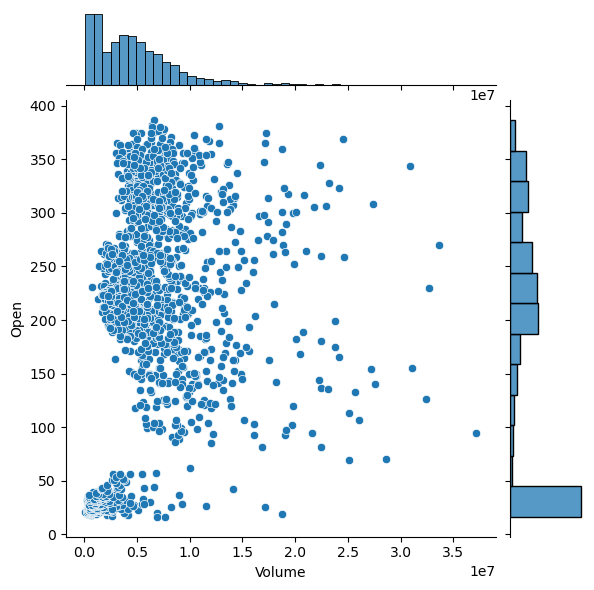

In [46]:
sns.jointplot(data=tesla, x='High', y='Open')
sns.jointplot(data=tesla, x='Low', y='Open')
sns.jointplot(data=tesla, x='Close', y='Open')
sns.jointplot(data=tesla, x='Volume', y='Open')

In [24]:
# setting layout for our plot
layout = go.Layout(
    title = 'Stock Price Of Tesla',
    xaxis=dict(
    title = 'Date',
    titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
      )
    ),
     yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

    

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)
        
    

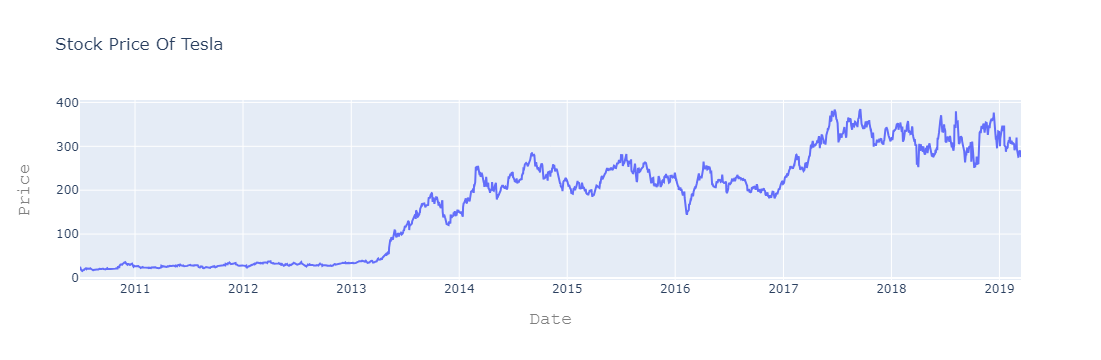

In [25]:
#plotting offline
iplot(plot)

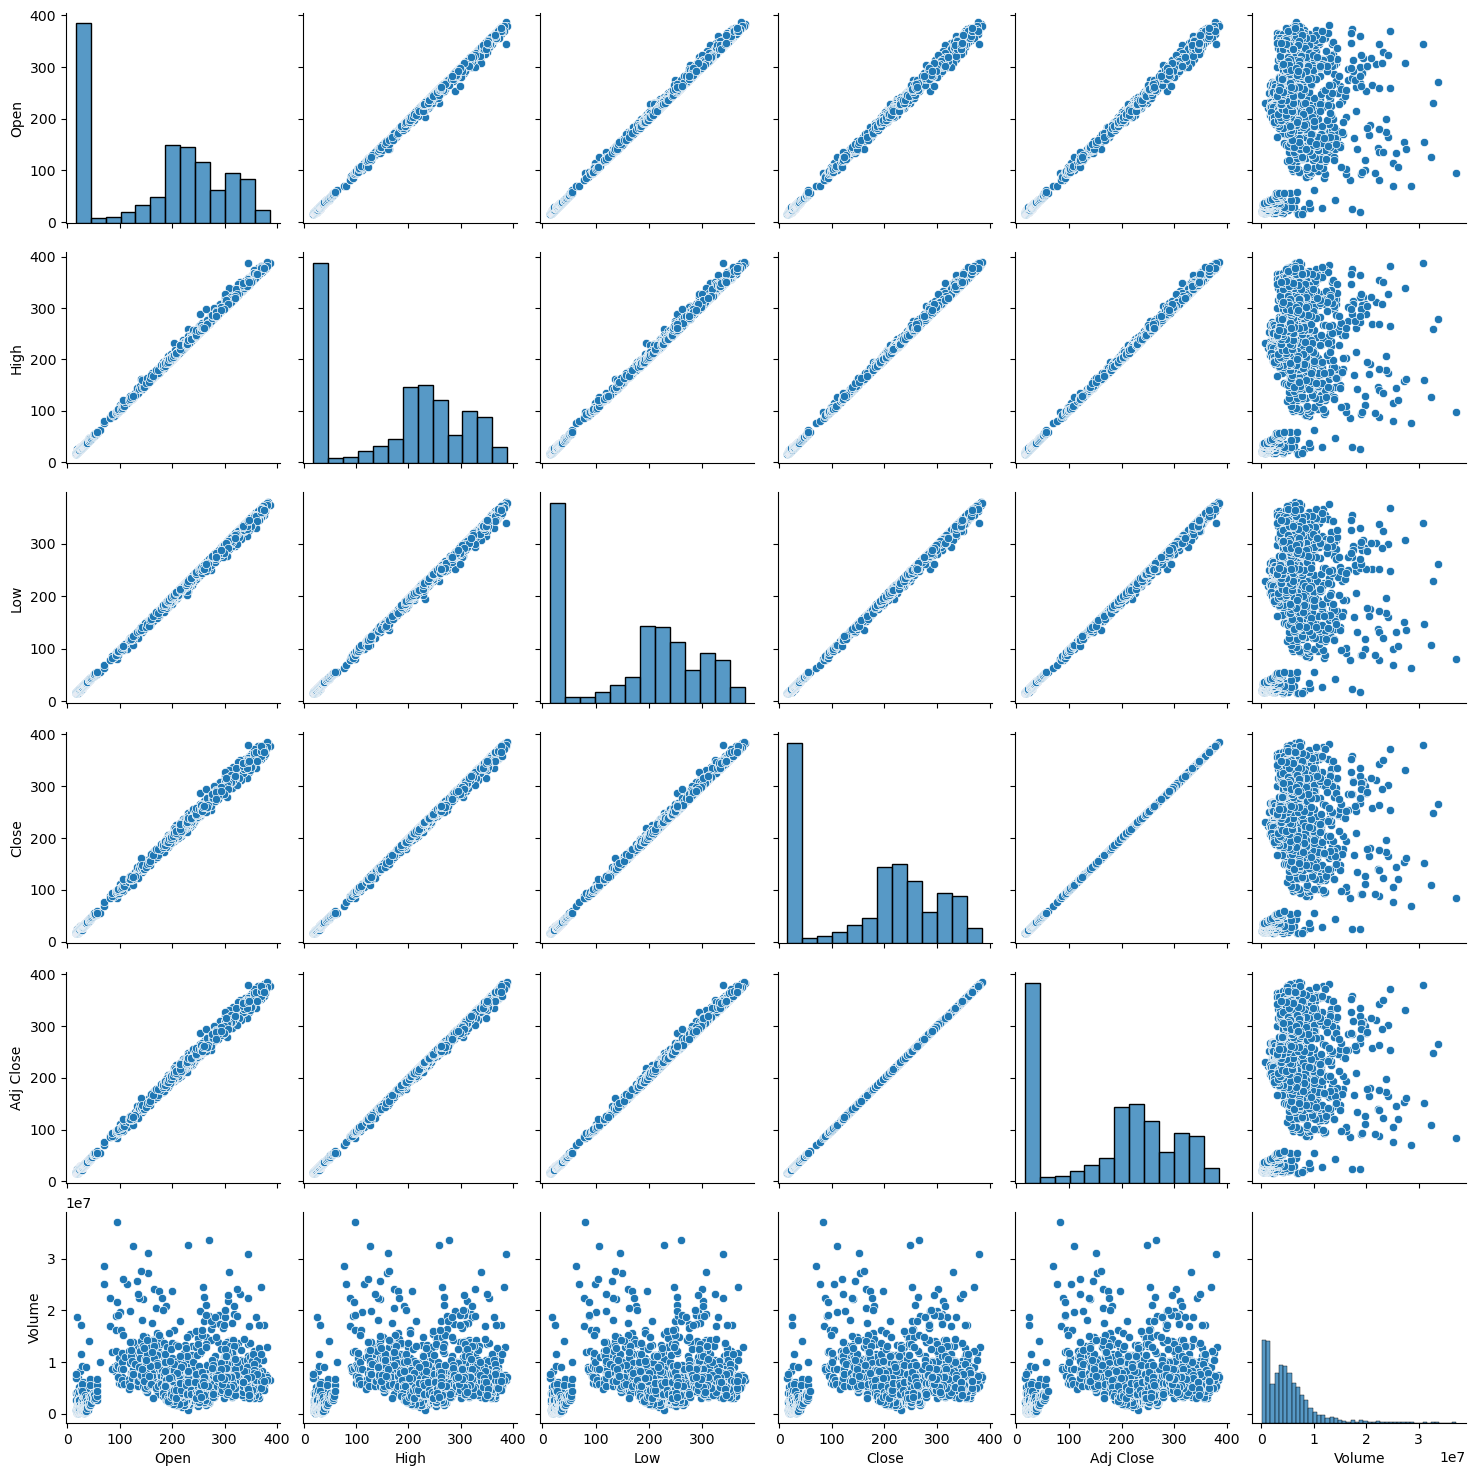

In [47]:
sns.pairplot(tesla)

In [30]:
# Building the Regression Model
from sklearn.model_selection import train_test_split

# for preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [32]:
#split the data into train and test model
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)



In [33]:
# Feature Scaling
scaler = StandardScaler().fit(X_train)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Creating a linear Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [38]:
# plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

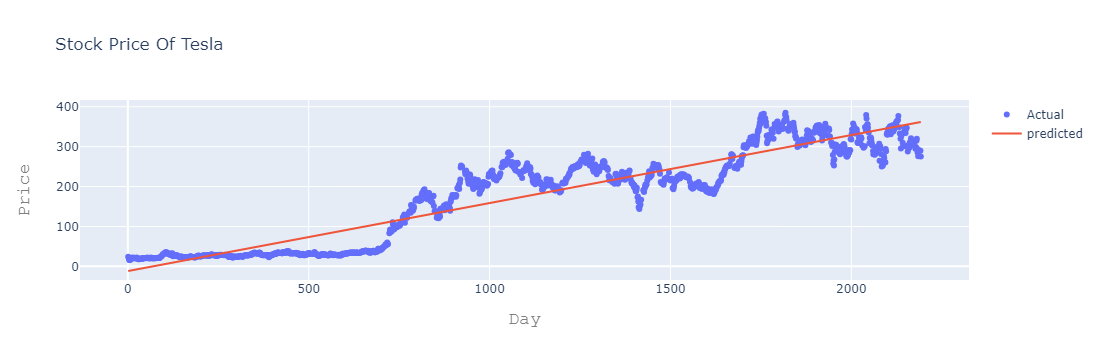

In [39]:
iplot(plot2)